In [17]:
import os
import pandas as pd
import numpy as np
from pycaret.datasets import get_data

In [18]:
url=('https://raw.githubusercontent.com/iNeuronai/EDACollection/master/Cristiano_Ronaldo/yds_data.csv')

In [19]:
dataset=pd.read_csv(url, encoding='latin-1')

In [22]:
dataset

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.00,50.608,54.2000,38.000
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.00,28.800,22.0000,35.000
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.00,0.000,63.7216,54.400
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.00,122.608,52.0000,42.000
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.00,0.000,19.0000,20.000
5,5,244.0,-145.0,-11.0,9.0,3.0,0.0,NaN,32.0,34.0,...,"45.539131, -122.651648",shot - 17,NaN,20000012,1610612747,9.00,3.00,0.000,NaN,34.000
6,6,251.0,0.0,0.0,8.0,NaN,0.0,2000-01,52.0,20.0,...,"45.539131, -122.651648",NaN,shot - 4,20000012,1610612747,8.00,3.00,0.000,112.2000,89.400
7,7,254.0,1.0,28.0,8.0,3.0,0.0,2000-01,5.0,22.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,68.64,3.00,0.000,5.0000,22.000
8,8,265.0,-65.0,NaN,6.0,3.0,0.0,2000-01,12.0,32.0,...,"45.539131, -122.651648",shot - 36,NaN,20000012,1610612747,6.00,3.00,0.000,12.0000,32.000
9,9,294.0,-33.0,NaN,3.0,3.0,0.0,2000-01,36.0,32.0,...,"45.539131, -122.651648",shot - 44,NaN,20000012,1610612747,3.00,3.00,0.000,52.2000,NaN


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 28 columns):
Unnamed: 0               30697 non-null int64
match_event_id           29134 non-null float64
location_x               29236 non-null float64
location_y               29157 non-null float64
remaining_min            29135 non-null float64
power_of_shot            29211 non-null float64
knockout_match           29180 non-null float64
game_season              24835 non-null object
remaining_sec            29103 non-null float64
distance_of_shot         29130 non-null float64
is_goal                  24429 non-null float64
area_of_shot             29195 non-null object
shot_basics              29122 non-null object
range_of_shot            29133 non-null object
team_name                29162 non-null object
date_of_game             29147 non-null object
home/away                29200 non-null object
shot_id_number           29134 non-null float64
lat/lng                  29132 non-n

In [20]:
data = dataset.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (27627, 28)
Unseen Data For Predictions: (3070, 28)


In [21]:
from pycaret.classification import *

In [27]:
exp_clf101 = setup(data = data, target = 'is_goal', session_id=123)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(27627, 28)"
4,Missing Values,True
5,Numeric Features,13
6,Categorical Features,13
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [28]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.6363,0.6445,0.3448,0.682,0.4577,0.2263
1,Gradient Boosting Classifier,0.6352,0.6433,0.3465,0.6774,0.4583,0.2246
2,CatBoost Classifier,0.633,0.6446,0.4036,0.64,0.4949,0.2294
3,Ada Boost Classifier,0.6314,0.643,0.3725,0.6509,0.4736,0.2213
4,Light Gradient Boosting Machine,0.6303,0.644,0.3931,0.6384,0.4864,0.2224
5,Ridge Classifier,0.6267,0,0.3968,0.6287,0.4864,0.2162
6,Linear Discriminant Analysis,0.6267,0.6388,0.3993,0.6277,0.4879,0.2166
7,Extra Trees Classifier,0.6086,0.6209,0.3994,0.5899,0.4762,0.182
8,Random Forest Classifier,0.595,0.6029,0.3659,0.5716,0.4461,0.1505
9,Decision Tree Classifier,0.5581,0.5527,0.5034,0.5044,0.5039,0.1055


In [36]:
tuned_xgboost=create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6457,0.6776,0.3639,0.6964,0.4780,0.2478
1,0.6301,0.6413,0.3552,0.6577,0.4612,0.2162
2,0.6450,0.6593,0.3523,0.7035,0.4694,0.2448
3,0.6301,0.6348,0.3333,0.6716,0.4455,0.2127
4,0.6422,0.6363,0.3586,0.6891,0.4717,0.2399
5,0.6351,0.6351,0.3499,0.6742,0.4607,0.2247
6,0.6273,0.6263,0.3134,0.6761,0.4283,0.2035
7,0.6325,0.6340,0.3163,0.6911,0.4340,0.2142
8,0.6409,0.6484,0.3499,0.6916,0.4647,0.2360
9,0.6338,0.6523,0.3552,0.6685,0.4639,0.2235


In [37]:
print(tuned_xgboost)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)


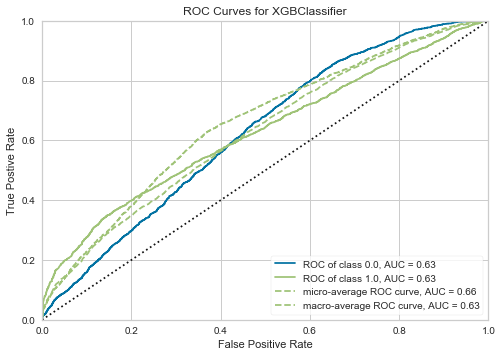

In [38]:
plot_model(tuned_xgboost, plot = 'auc')

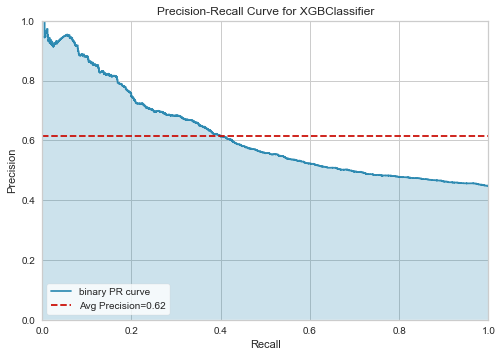

In [40]:
plot_model(tuned_xgboost, plot = 'pr')

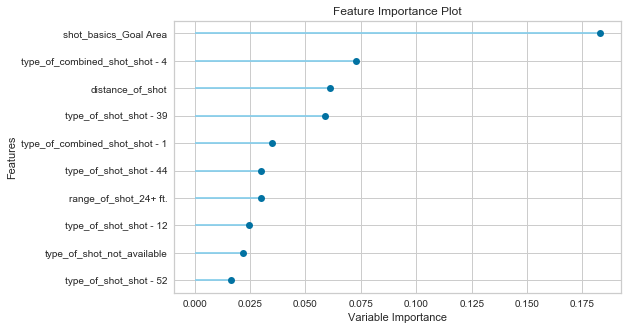

In [41]:
plot_model(tuned_xgboost, plot='feature')

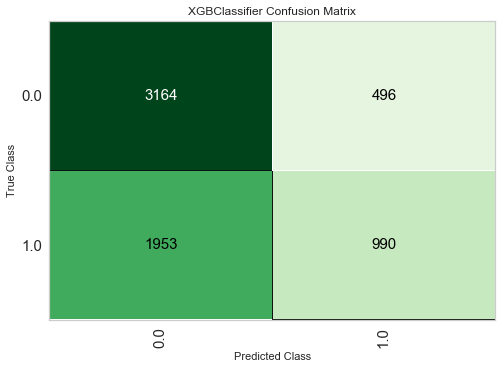

In [42]:
plot_model(tuned_xgboost, plot = 'confusion_matrix')

In [43]:
predict_model(tuned_xgboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.6291,0.6275,0.3364,0.6662,0.4471,0.2111


In [45]:
predict_model(tuned_xgboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.6291,0.6275,0.3364,0.6662,0.4471,0.2111


In [49]:

final_xgboost = finalize_model(tuned_xgboost)

In [50]:
unseen_predictions = predict_model(final_xgboost, data=data_unseen)
unseen_predictions.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1,Label,Score
0,27627,310.0,92.0,15.0,1.0,NaN,1.0,2003-04,32.0,29.0,...,NaN,40300315,1610612747,50.64,3.0,1.000,32.0,29.000,0,0.3745
1,27628,331.0,-125.0,183.0,10.0,4.0,1.0,2003-04,NaN,42.0,...,shot - 3,40300315,1610612747,10.00,4.0,1.000,35.0,114.728,0,0.4028
2,27629,385.0,NaN,0.0,5.0,4.0,1.0,2003-04,54.0,20.0,...,NaN,40300315,1610612747,5.00,4.0,38.928,54.0,20.000,1,0.7240
3,27630,388.0,0.0,0.0,5.0,4.0,1.0,2003-04,22.0,20.0,...,shot - 4,40300315,1610612747,76.20,4.0,1.000,80.2,20.000,1,0.5864
4,27631,400.0,146.0,10.0,3.0,4.0,1.0,NaN,43.0,34.0,...,shot - 3,40300315,1610612747,3.00,4.0,1.000,43.0,34.000,0,0.3880


In [51]:
save_model(final_xgboost,'Final RF Model 08Feb2020')

Transformation Pipeline and Model Succesfully Saved


In [52]:

saved_final_xgboost = load_model('Final RF Model 08Feb2020')

Transformation Pipeline and Model Sucessfully Loaded


In [53]:
new_prediction = predict_model(saved_final_xgboost, data=data_unseen)

In [54]:
new_prediction

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1,Label,Score
0,27627,310.0,92.0,15.0,1.0,NaN,1.0,2003-04,32.0,29.0,...,NaN,40300315,1610612747,50.64,3.00,1.000,32.0000,29.000,0,0.3745
1,27628,331.0,-125.0,183.0,10.0,4.0,1.0,2003-04,NaN,42.0,...,shot - 3,40300315,1610612747,10.00,4.00,1.000,35.0000,114.728,0,0.4028
2,27629,385.0,NaN,0.0,5.0,4.0,1.0,2003-04,54.0,20.0,...,NaN,40300315,1610612747,5.00,4.00,38.928,54.0000,20.000,1,0.7240
3,27630,388.0,0.0,0.0,5.0,4.0,1.0,2003-04,22.0,20.0,...,shot - 4,40300315,1610612747,76.20,4.00,1.000,80.2000,20.000,1,0.5864
4,27631,400.0,146.0,10.0,3.0,4.0,1.0,NaN,43.0,34.0,...,shot - 3,40300315,1610612747,3.00,4.00,1.000,43.0000,34.000,0,0.3880
5,27632,413.0,222.0,NaN,2.0,4.0,1.0,2003-04,13.0,42.0,...,NaN,40300315,1610612747,2.00,4.00,21.800,13.0000,42.000,0,0.3509
6,27633,418.0,-146.0,206.0,1.0,4.0,1.0,NaN,52.0,45.0,...,shot - 3,40300315,1610612747,1.00,4.00,1.000,70.2000,45.000,0,0.3515
7,27634,2.0,0.0,0.0,11.0,1.0,1.0,2003-04,41.0,20.0,...,shot - 1,40300316,1610612747,NaN,1.00,1.000,41.0000,20.000,1,0.9036
8,27635,24.0,0.0,0.0,8.0,1.0,1.0,NaN,37.0,NaN,...,shot - 4,40300316,1610612747,8.00,1.00,1.000,37.0000,20.000,0,0.4711
9,27636,31.0,39.0,89.0,7.0,1.0,1.0,2003-04,47.0,29.0,...,shot - 3,40300316,1610612747,7.00,1.00,NaN,47.0000,29.000,0,0.4319
